In [ ]:
%pip install 'qbraid[visualization]>=0.9.0.dev' -q

In [ ]:
from qbraid import QbraidProvider
from qbraid.visualization import plot_histogram, plot_distribution

provider = QbraidProvider(api_key="YOUR_API_KEY")
provider.save_config()

In [2]:
devices = provider.get_devices(provider="IonQ")

print(f"{'Device ID':<15} {'Status':<10}")
print("-" * 25)

for device in devices:
    print(f"{device.id:<15} {device.status().name:<10}")

Device ID       Status    
-------------------------
ionq_simulator  ONLINE    
ionq_harmony    RETIRED   
ionq_aria_1     UNAVAILABLE
ionq_aria_2     ONLINE    
ionq_forte_1    ONLINE    


In [3]:
device = provider.get_device("ionq_simulator")

In [4]:
device.num_qubits

29

In [5]:
device.profile.noise_models

NoiseModelSet(['aria-1', 'harmony', 'ideal'])

In [6]:
# GHZ state as an OpenQASM 2 string.
# Note: no measurement gates are included.

qasm_ghz = """
OPENQASM 2;
include "qelib1.inc";
qreg q[3];

h q[0];
cx q[0], q[1];
cx q[1], q[2];
"""

In [7]:
job = device.run(qasm_ghz, shots=1000)

In [8]:
job.status()

<INITIALIZING: 'job is being initialized'>

In [9]:
job.wait_for_final_state()

result = job.result()

result.details

{'status': 'COMPLETED',
 'statusText': 'job has successfully run',
 'shots': 1000,
 'experimentType': 'GATE_MODEL',
 'timeStamps': {'createdAt': datetime.datetime(2024, 10, 30, 21, 49, 36),
  'endedAt': datetime.datetime(2024, 10, 30, 21, 49, 38),
  'executionDuration': 19},
 'tags': {'errorMitigationDebias': False},
 'cost': Credits('0'),
 'schemaHeader': {'name': 'qbraid.runtime.schemas.job', 'version': 1.0},
 'metadata': {'openQasm': 'OPENQASM 2;\ninclude "qelib1.inc";\nqreg q[3];\n\nh q[0];\ncx q[0], q[1];\ncx q[1], q[2];',
  'circuitNumQubits': 3,
  'circuitDepth': 3}}

In [10]:
counts = result.data.get_counts()
probabilities = result.data.get_probabilities()

print(f"Measurement Counts: {counts}")
print(f"Probabilities: {probabilities}")

Measurement Counts: {'000': 500, '111': 500}
Probabilities: {'000': 0.5, '111': 0.5}


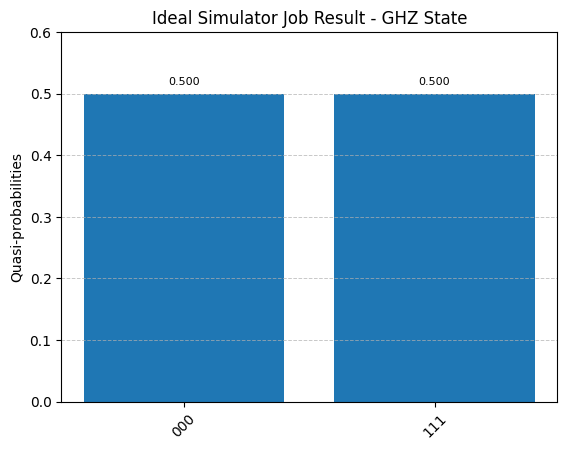

In [11]:
plot_distribution(counts, title="Ideal Simulator Job Result - GHZ State")

In [12]:
# OpenQASM 2 string with IonQ native gates

qasm_ionq_native = """
OPENQASM 2;
include "qelib1.inc";
qreg q[3];

gpi(0.5) q[0];
gpi2(0.5) q[1];
ms(0, 0.5, 0.25) q[1], q[2];
"""

In [13]:
job = device.run(qasm_ionq_native, shots=1000, noise_model="aria-1")

In [14]:
job.wait_for_final_state()

result = job.result()

In [15]:
counts = result.data.get_counts(decimal=True)

print(f"Counts: {counts}")

Counts: {0: 1, 1: 262, 3: 259, 5: 235, 7: 243}


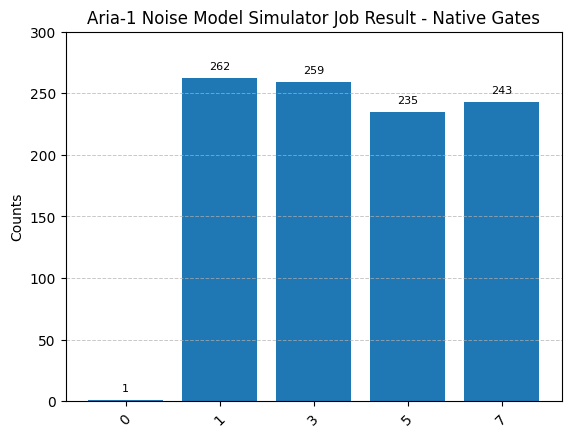

In [16]:
plot_histogram(counts, title="Aria-1 Noise Model Simulator Job Result - Native Gates")

In [ ]:
# device = provider.get_device("ionq_aria_2")

# job = device.run(qasm, shots=100, error_mitigation={"debias": False})